<img src="https://ucfai.org//course/sp19/linear-regression/banner.jpg">

<div class="col-12">
    <a class="btn btn-success btn-block" href="https://ucfai.org/signup">
        First Attendance? Sign Up!
    </a>
</div>

<div class="col-12">
    <h1> Starting with the Basics, Regression </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <strong> Liam Jarvis</strong>
        (<a href="https://github.com/JarvisEQ">@JarvisEQ</a>)
    
        <strong> John Muchovej</strong>
        (<a href="https://github.com/ionlights">@ionlights</a>)
     on 2019-02-06</p>
</div>

___
## **[Die Präsentation](https://docs.google.com/presentation/d/12MvqRMZlKL3DwqAX1XqQMaL21UUV29hLkEcYO3liHfs/edit?usp=sharing)**

----

--------------------------------------------------

## **Linear Regression**

--------------------------------------------------

First thing first, we to get some packages 

*   matplotlib allows us to graph 
*   numpy is powerful package for data manipulation
*   pandas is a tool for allowing us to interact with large datasets
*   sklearn is what we'll use for making the models
*   !wget grabs the data set we'll be using later

In [4]:
#import some stuff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets, linear_model
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" 
!wget "http://jse.amstat.org/v19n3/decock/AmesHousing.txt"

--2019-02-06 19:53:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: ‘adult.data.6’

adult.data.6        100%[===================>]   3.79M  4.91MB/s    in 0.8s    

2019-02-06 19:53:50 (4.91 MB/s) - ‘adult.data.6’ saved [3974305/3974305]

--2019-02-06 19:53:51--  http://jse.amstat.org/v19n3/decock/AmesHousing.txt
Resolving jse.amstat.org (jse.amstat.org)... 107.180.48.28
Connecting to jse.amstat.org (jse.amstat.org)|107.180.48.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960807 (938K) [text/plain]
Saving to: ‘AmesHousing.txt.6’

AmesHousing.txt.6   100%[===================>] 938.29K  1.24MB/s    in 0.7s    

2019-02-06 19:53:52 (1.24 MB/s) - ‘AmesHousing.txt.6’ saved [960807

The data for this example is arbitrary (we'll use real data in a bit), but there is a clear linear relationship here

Graphing the data will make this relationship clear to see

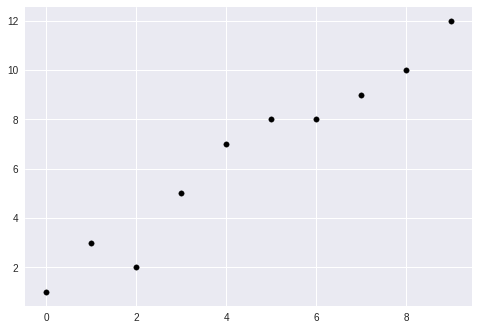

In [5]:
#Get some data 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

#Let's plot the data to see what it looks like
plt.scatter(x, y, color = "black", 
               marker = "o", s = 30) 
plt.show()

Here's the meat of the calculations

This is using least squares estimation, which tries to minimize the squared error of the function vs. the training data

SS_xy is the cross deviation about x, and SS_xx is the deviation about x

[It's basically some roundabout algebra methods to optimize a function](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf) 

The concept isn't super complicated but it gets hairy when you do it by hand

In [6]:
#calculating the coefficients

# number of observations/points 
n = np.size(x) 

# mean of x and y vector 
m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
SS_xy = np.sum(y*x - n*m_y*m_x) 
SS_xx = np.sum(x*x - n*m_x*m_x) 

# calculating regression coefficients 
b_1 = SS_xy / SS_xx 
b_0 = m_y - b_1*m_x

#var to hold the coefficients
b = (b_0, b_1)

#print out the estimated coefficients
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 

Estimated coefficients:
b_0 = -0.0586206896552 
b_1 = 1.45747126437


But, we don't need to directly program all of the maths everytime we do linear regression

sklearn has built in functions that allows you to quickly do Linear Regression with just a few lines of code

We're going to use sklearn to make a model and then plot it using matplotlib


In [0]:
#we need to reshape the array to make the sklearn gods happy
x = x.reshape(-1,1)
y = y.reshape(-1,1)

#making the model
regress = linear_model.LinearRegression()
regress.fit(x, y)
y_sk_pred = regress.predict([[6]])

And now lets see what the model looks like

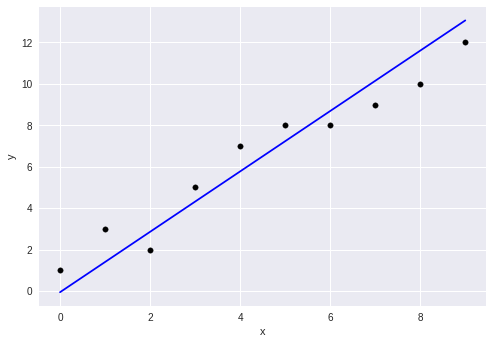

In [8]:
# plotting the actual points as scatter plot 
plt.scatter(x, y, color = "black", 
           marker = "o", s = 30) 

# predicted response vector 
y_pred = b[0] + b[1]*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "blue") 

# putting labels 
plt.xlabel('x') 
plt.ylabel('y') 

# function to show plot 
plt.show()

So now we can make predictions with new points based off our data

In [9]:
#here we can try out any data point
print(regress.predict([[6]]))

[[8.25454545]]


--------------------------------------------
## Applied Linear Regression 
--------------------------------------------


###The Ames Housing Dataset 
> Ames is a city located in Iowa.
> 
> - This data set consists of all property sales
collected by the Ames City Assessor’s Office between the years
of 2006 and 2010.
> - Originally contained 113 variables and 3970 property sales
pertaining to the sale of stand-alone garages, condos, storage
areas, and of course residential property.
> - Distributed to the public as a means to replace the old Boston
Housing 1970’s data set.  
> - [Link to Original](http://lib.stat.cmu.edu/datasets/boston) 
> - The "cleaned" version of this dataset contains 2930 observations along with 80
predictor variables and two identification variables.


###What was the original purpose of this data set? 

That is, why did the Amess City Assessor's Office decide to collect this data? 

> - **Answer**: To update the assessment model used by the Ames
City Assessor’s Office.

Now you may ask, what is an assessment model? 

>- **Answer**: In short, an assessment model is used to assign dollar value to a property that reflects the true market value of that property.

Now according to the Iowa Department of Revenue’s website, primary beneficiaries of the revenue generated by
property taxes include but are not limited to: 
> - K-12 Schools, Hospitals, Assessors, Townships, and Agricultural
Extension Districts.

**Moral of this story**: We will be using the modified Ames housing dataset to predict housing price. 


###What's inside? 

This ”new” data set contains 2930 (n=2930) observations along with 80
predictor variables and two identification variables. 

[Paper linked to dataset](http://jse.amstat.org/v19n3/decock.pdf)

An exhaustive variable breakdown can be found
[here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

###**Quick Summary** 
---
Of the 80 predictor variables we have:
> - 20 continuous variables (area dimension)
 - Garage Area, Wood Deck Area, Pool Area
> - 14 discrete variables (items occurring)
 - Remodeling Dates, Month and Year Sold
 > - 23 nominal and 23 ordinal 
 - Nominal: Condition of the Sale, Type of Heating and
Foundation
 - Ordinal: Fireplace and Kitchen Quality, Overall
Condition of the House




***Question to Answer***: What is the linear relationship between sale price on above ground
living room area?

But first lets visually investigate what we are trying to predict. 

We shall start our analysis with summary statistics. 

In [10]:
housing_data =  pd.read_csv("AmesHousing.txt", delimiter="\t") 

#Mean Sales price 
mean_price = np.mean(housing_data["SalePrice"])
print("Mean Price : " + str(mean_price))

#Variance of the Sales Price 
var_price = np.var(housing_data["SalePrice"], ddof=1)
print("Variance of Sales Price : " + str(var_price))

#Median of Sales Price 
median_price = np.median(housing_data["SalePrice"])
print("Median Sales Price : " + str(median_price))

#Skew of Sales Price 
skew_price = st.skew(housing_data["SalePrice"])
print("Skew of Sales Price : " + str(skew_price))

Mean Price : 180796.0600682594
Variance of Sales Price : 6381883615.6884365
Median Sales Price : 160000.0
Skew of Sales Price : 1.74260737195


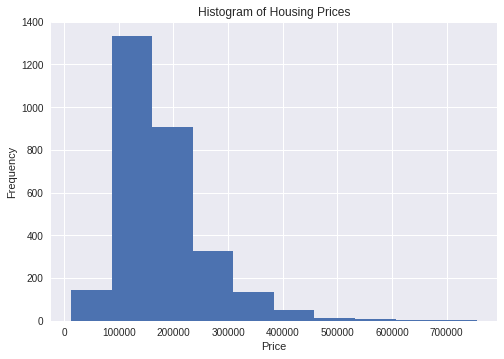

In [11]:
plt.hist(housing_data["SalePrice"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Housing Prices")
plt.show()

Another way we can view our data is with a box and whisker plot.

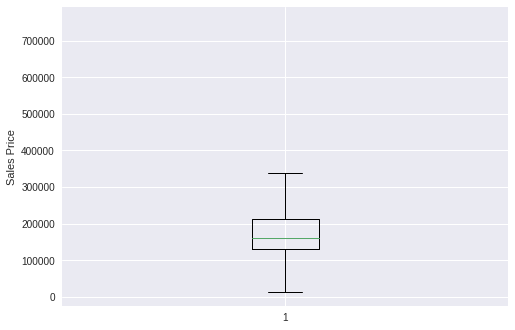

In [12]:
plt.boxplot(housing_data["SalePrice"])
plt.ylabel("Sales Price")
plt.show()

Now we shall look at sales price on above ground living room area. 

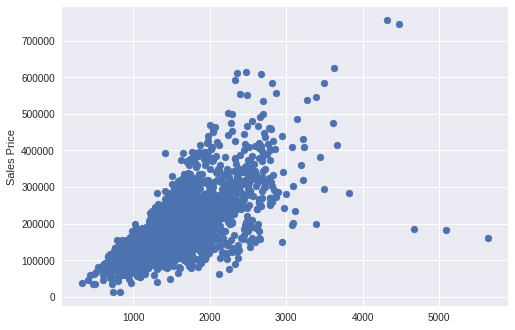

In [13]:
plt.scatter(housing_data["Gr Liv Area"], housing_data["SalePrice"])
plt.ylabel("Sales Price")
plt.show()

Finally, lets generate our model and see how it predicts Sales Price!!

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


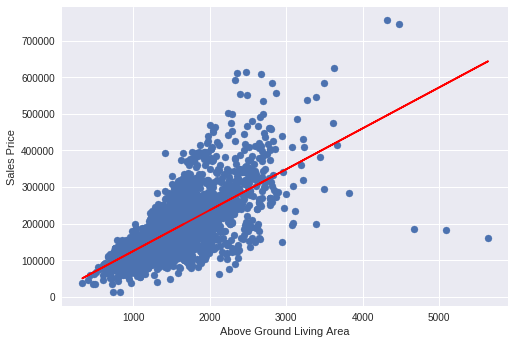

In [14]:
#we need to reshape the array to make the sklearn gods happy
area_reshape = housing_data["Gr Liv Area"].reshape(-1,1)
price_reshape = housing_data["SalePrice"].reshape(-1,1)

#Generate the Model
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(area_reshape, price_reshape)
price_prediction = model.predict(area_reshape)

# plotting the actual points as scatter plot 
plt.scatter(area_reshape, price_reshape) 

# plotting the regression line 
plt.plot(area_reshape, price_prediction, color = "red") 

# putting labels 
plt.xlabel('Above Ground Living Area') 
plt.ylabel('Sales Price') 

# function to show plot 
plt.show()

--------------------------------------------

## **Applied Logistic Regression**

--------------------------------------------

In [0]:
#we're going to need a different model, so let's import it
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

This data set was provided by UCI's Machine Learning Repository: 

*  [Adult Data Set (Also know as Census Income)](https://archive.ics.uci.edu/ml/datasets/Adult)

We already downloaded the dataset at the begining of the notebook, so now let's mess around with it.

But before that, we need to read in the data, and pandas has the functions we need to do this


In [38]:
#read_csv allow us to easily import a whole dataset
data = pd.read_csv("adult.data", names =["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

#this tells us whats in it 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [39]:
# data.head() gives us some the the first 5 sets of the data
print(data.head())

#this is the function that give us some quick info about continous data in the dataset
print(data.describe())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

**Now here is the Qustion:**


>*Which one of these parameters are best in figuring out if someone is going to be making more then 50k a year?*

In [0]:
#put the name of the parameter you want to test
test = ""

Ploting will help with visualising the data

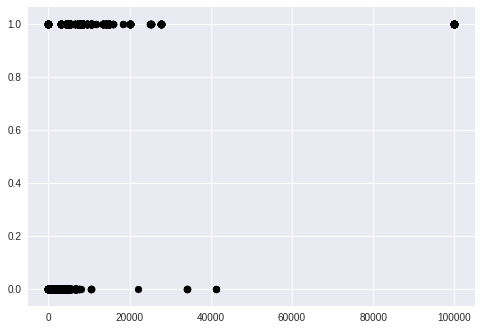

In [41]:
#little baby helper function
def incomeFixer(x):
  if x == " <=50K":
    return 0
  else:
    return 1

#change the income data into 0's and 1's
data["income"] = data.apply(lambda row: incomeFixer(row['income']), axis=1)

#ploting 
plt.scatter(data[test], data['income'], color= "black")
plt.show()

In [0]:
#but before we make our model, we need to modify our data a bit


#get the data we are going to make the model with 
x = np.array(data[test])
y = np.array(data["income"])

#again, lets make the scikitlearn gods happy
x = x.reshape(-1,1)

#Making the test-train split
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.25, random_state=42)

In [34]:
#now make data model!
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
#now need to test the model's performance
print(logreg.score(x_test,y_test))

0.802972607787741
